# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [25]:
#Import all the necessary modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [61]:
col_names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
pima_df = pd.read_csv("pima-indians-diabetes.data", names=col_names)
pima_df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [60]:
pima_df.sample(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
388,5,144,82,26,285,32.0,0.452,58,1
74,1,79,75,30,0,32.0,0.396,22,0
490,2,83,65,28,66,36.8,0.629,24,0
275,2,100,70,52,57,40.5,0.677,25,0
633,1,128,82,17,183,27.5,0.115,22,0
645,2,157,74,35,440,39.4,0.134,30,0
293,1,128,48,45,194,40.5,0.613,24,1
152,9,156,86,28,155,34.3,1.189,42,1
404,5,168,64,23,0,32.9,0.135,41,1
616,6,117,96,23,0,28.7,0.157,30,0


# Q3 Print the datatypes of each column and the shape of the dataset 

In [28]:
pima_df.info()
#Info itself gives the shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [30]:
# 1. preg - There can be 0 pregnancies
# 2. test - Not sure what kind of test was that. The test result could possibly accept 0. 
#           So, without knowing the test type, can not replace with 0
# 3. class - we expect either 0 or 1

#columns for which the 0s should be replaced with that columns median
col_names_na=['plas', 'pres', 'skin', 'mass', 'pedi', 'age']
#plasma count, blood pressure, skin thickness value, mass, pedi, age - can not be 0

for col in col_names_na:
    pima_df[col].replace(0, pima_df[col].median(), inplace=True)

# Q5 Print the descriptive statistics of each & every column using describe() function

In [31]:
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [33]:
pima_df.groupby(["class"]).count()
#The above function shows how the class frequency is distributed against other values in the dataset

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


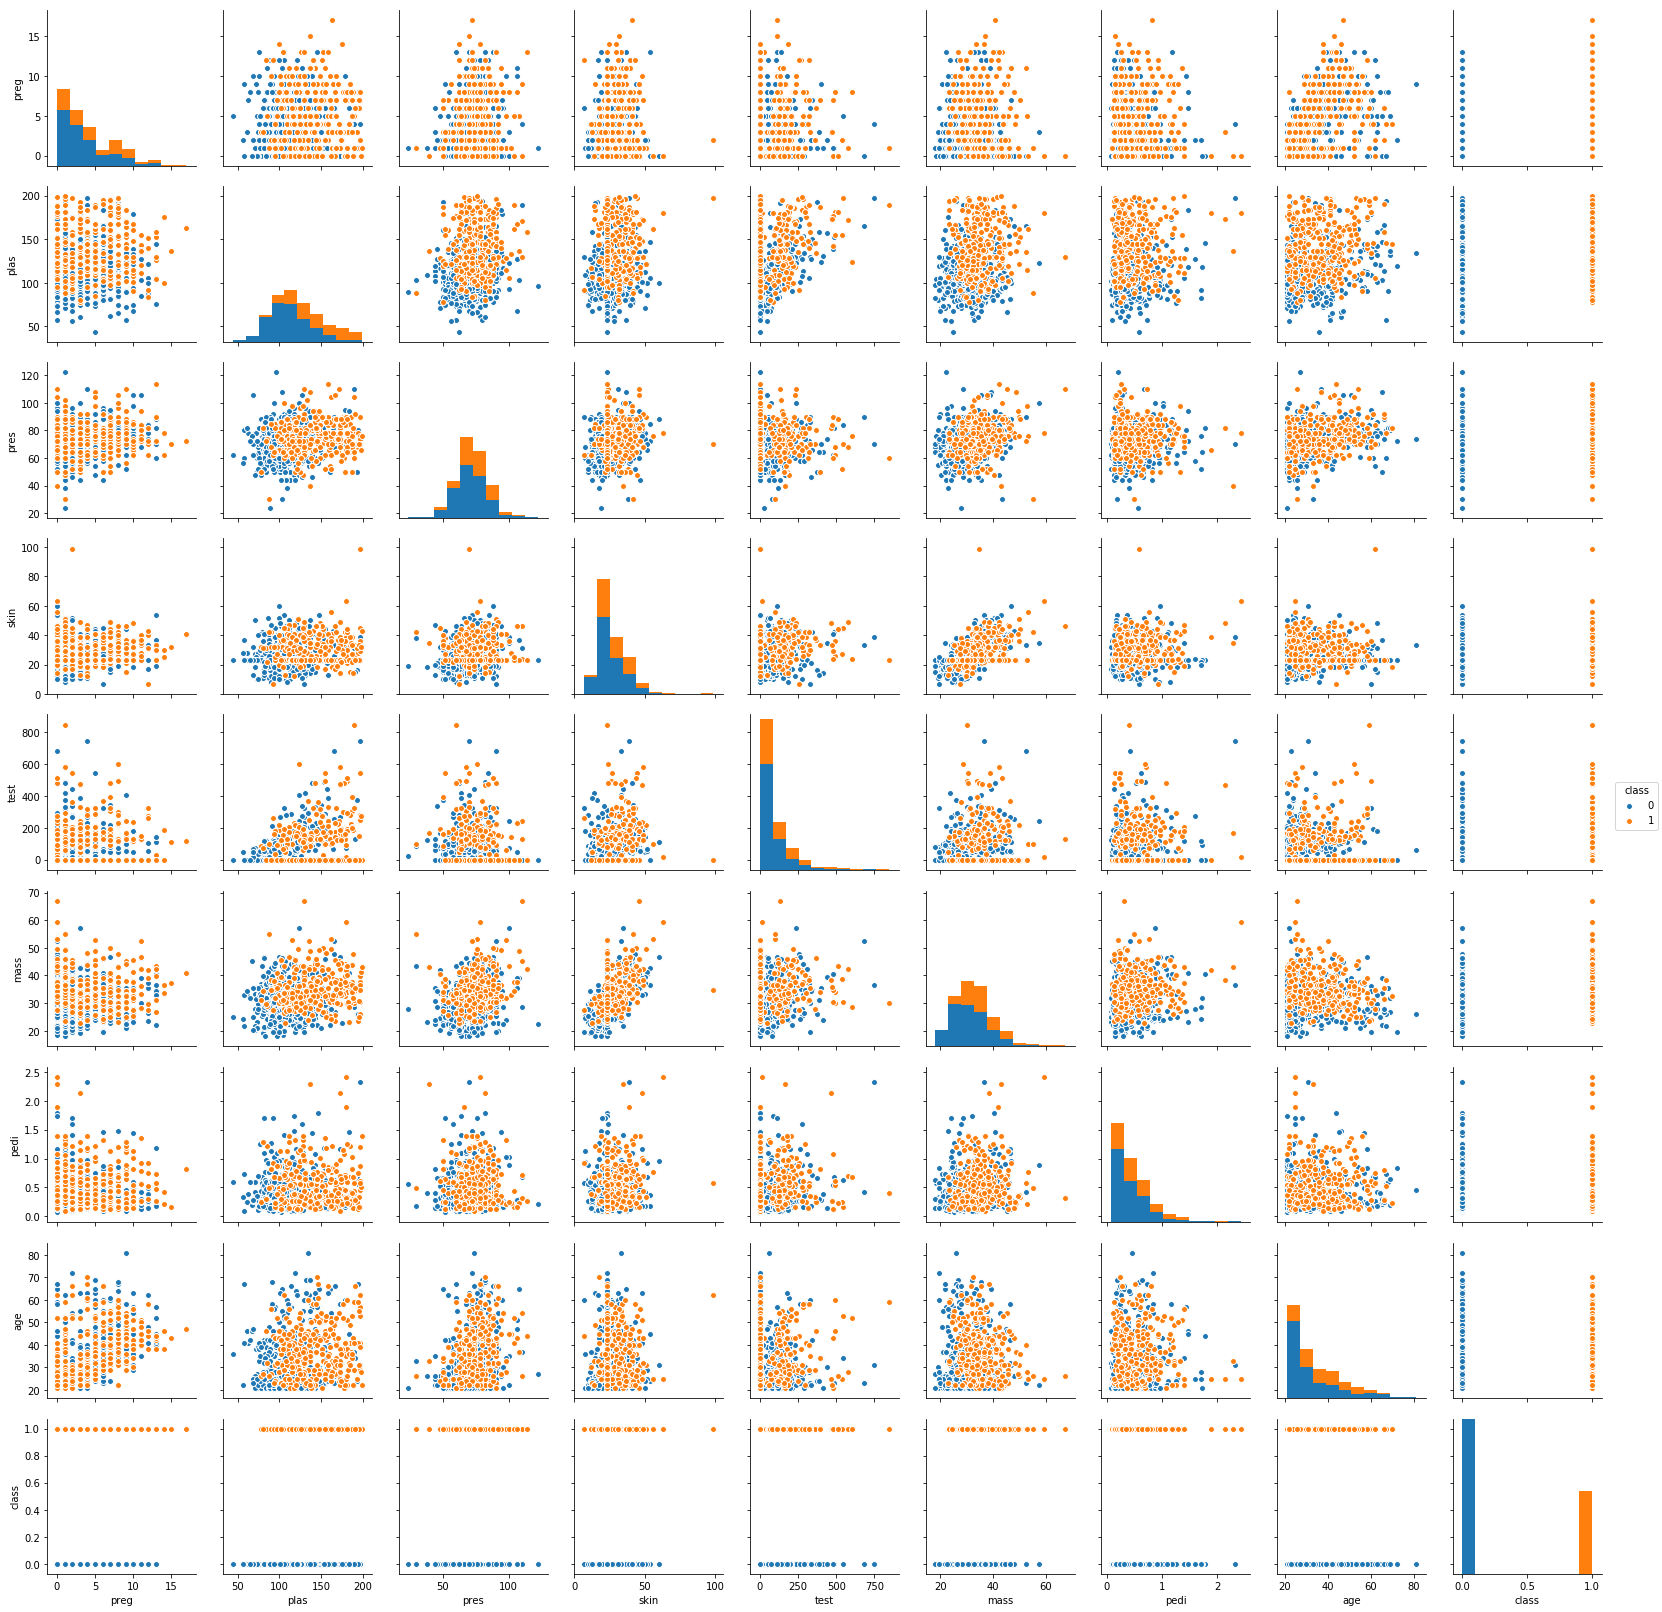

In [34]:
sns.pairplot(pima_df, hue = "class")

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [35]:
# Pressue and Plasma Count
# 1. seems to have normal distribution
# 2. Plasma count seems skewed

# No visible linear relationship between even age and pregnancy

Using bivariate analysis check for useful relationships between attributes and attributes and the target class



# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

In [36]:
pima_df.corr(method='pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.128213,0.208615,0.032568,-0.073535,0.021546,-0.033523,0.544341,0.221898
plas,0.128213,1.000000,0.218937,0.172143,0.331709,0.231400,0.137327,0.266909,0.492782
pres,0.208615,0.218937,1.000000,0.147809,-0.045769,0.281132,-0.002378,0.324915,0.165723
skin,0.032568,0.172143,0.147809,1.000000,0.244250,0.546951,0.142977,0.054514,0.189065
test,-0.073535,0.331709,-0.045769,0.244250,1.000000,0.185356,0.185071,-0.042163,0.130548
mass,0.021546,0.231400,0.281132,0.546951,0.185356,1.000000,0.153506,0.025744,0.312249
pedi,-0.033523,0.137327,-0.002378,0.142977,0.185071,0.153506,1.000000,0.033561,0.173844
age,0.544341,0.266909,0.324915,0.054514,-0.042163,0.025744,0.033561,1.000000,0.238356
class,0.221898,0.492782,0.165723,0.189065,0.130548,0.312249,0.173844,0.238356,1.000000


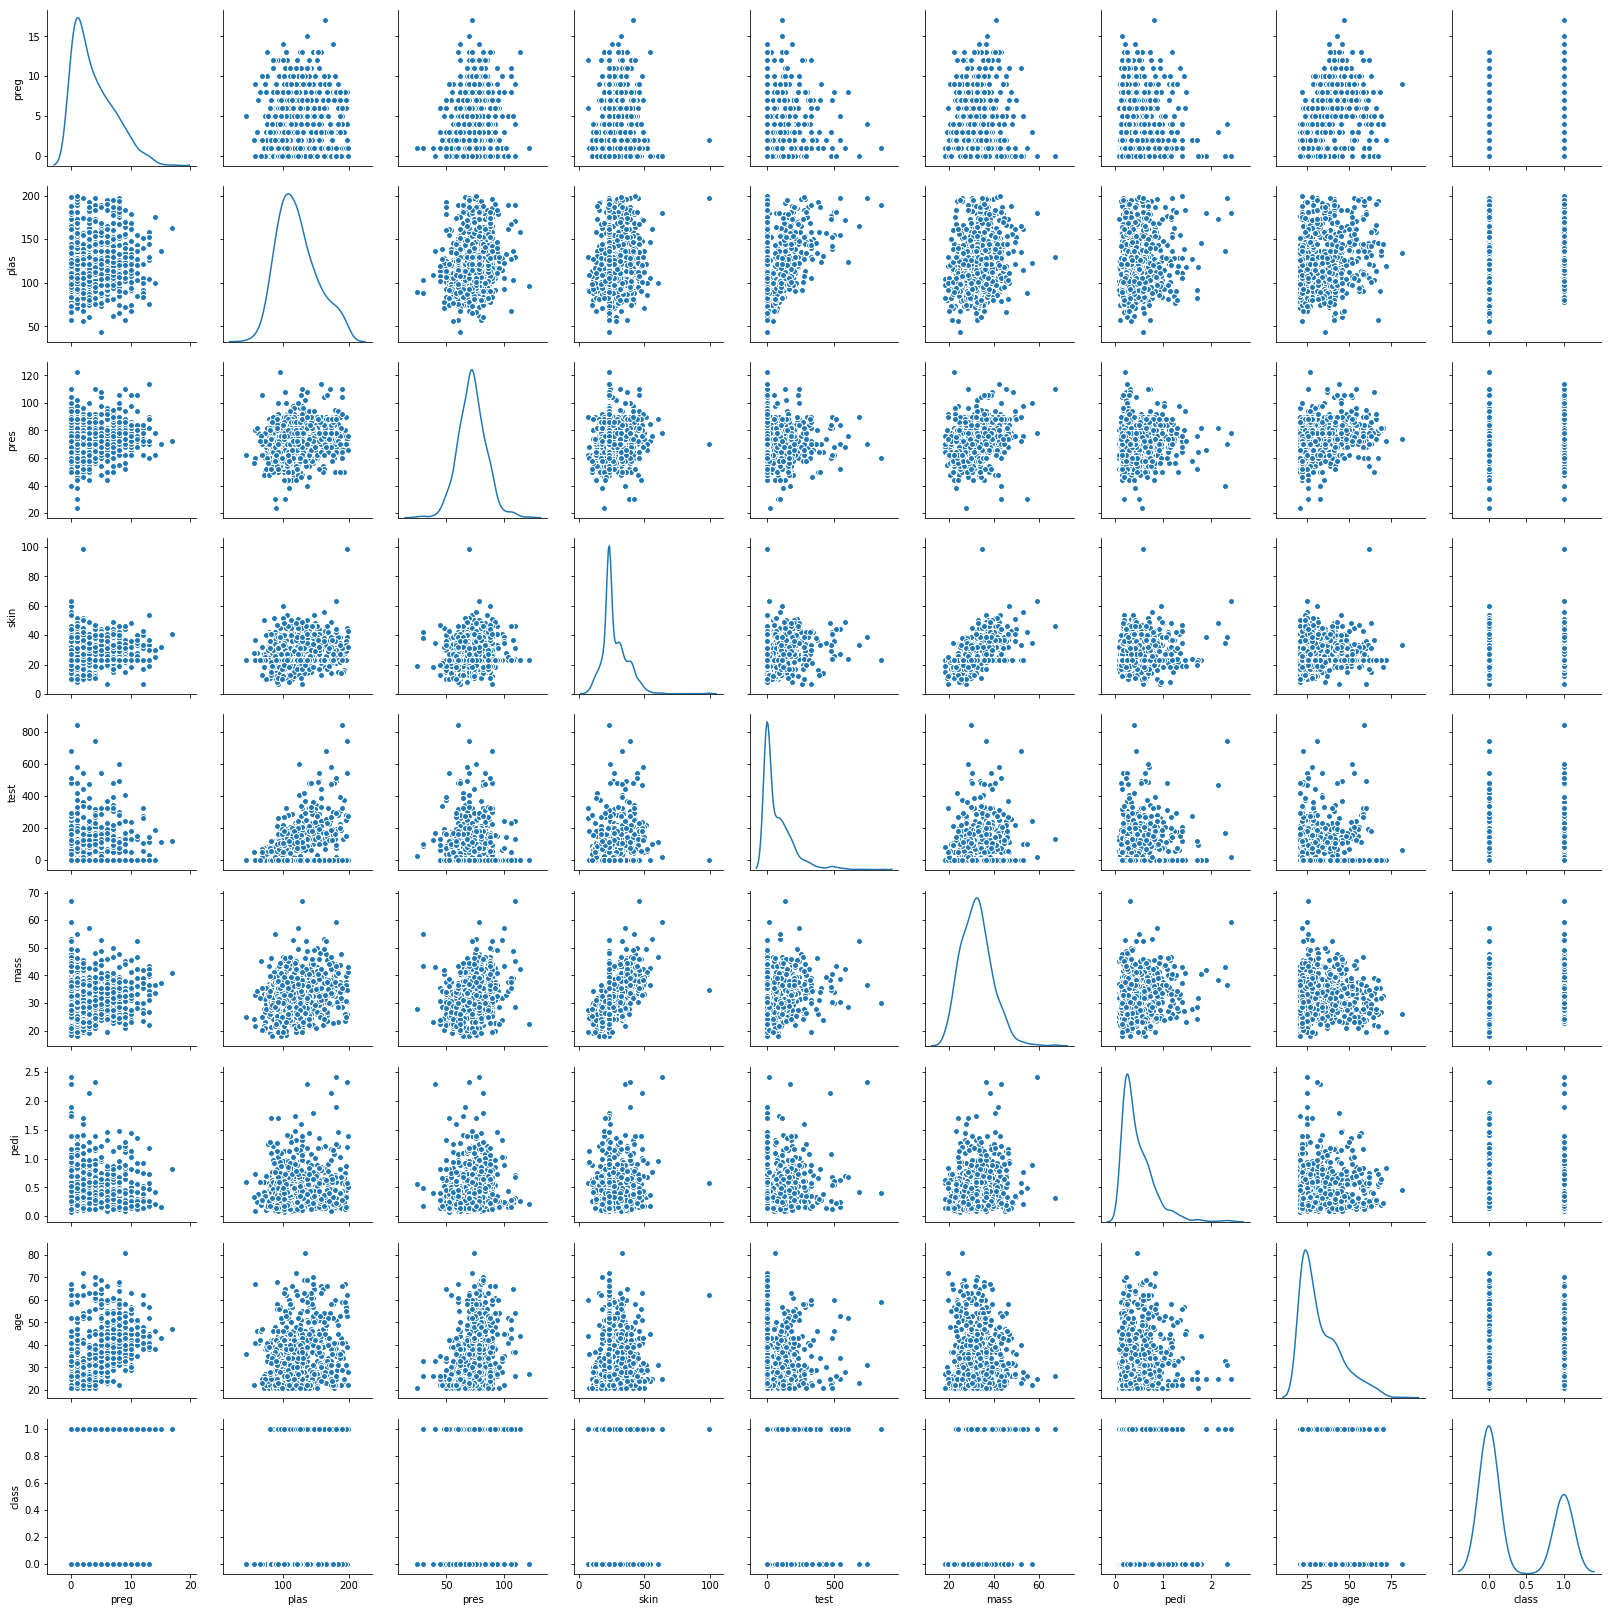

In [37]:
sns.pairplot(pima_df[col_names],diag_kind='kde')

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [40]:
X = pima_df[['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']]
Y = pima_df[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [41]:
dt_model = DecisionTreeClassifier(criterion = 'entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [42]:
print(dt_model.score(X_test , y_test))

0.7316017316017316


In [45]:
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[119  28]
 [ 34  50]]


Print the feature importance of the decision model - Optional

In [46]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
preg  0.073271
plas  0.293726
pres  0.063959
skin  0.072800
test  0.058333
mass  0.167815
pedi  0.109009
age   0.161086


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

C:\AIML\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7748917748917749
[[125  22]
 [ 30  54]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [53]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, y_train)

C:\AIML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7445887445887446
[[117  30]
 [ 29  55]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [55]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

C:\AIML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7922077922077922
[[122  25]
 [ 23  61]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, y_train)

C:\AIML\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7662337662337663
[[122  25]
 [ 29  55]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.